<a href="https://colab.research.google.com/github/Druwa-git/ml_basic/blob/main/ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install mglearn

# 지도 학습

In [7]:
from IPython.display import display
import sklearn
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd
import mglearn # 이 책을 위해 만들어진 라이브러리
import warnings

warnings.simplefilter("ignore") # warning 무시하기
%matplotlib inline

X.shape: (26, 2)


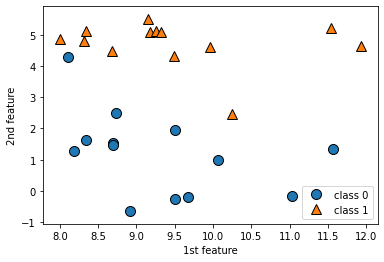

In [14]:
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["class 0", "class 1"], loc=4)
plt.xlabel("1st feature")
plt.ylabel("2nd feature")
print(f"X.shape: {X.shape}")

Text(0, 0.5, 'target')

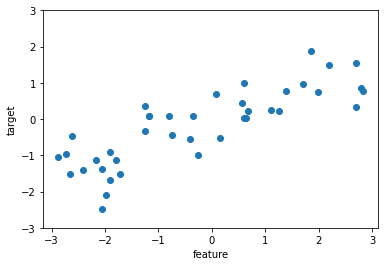

In [17]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3) #set restrict of target
plt.xlabel("feature")
plt.ylabel("target")

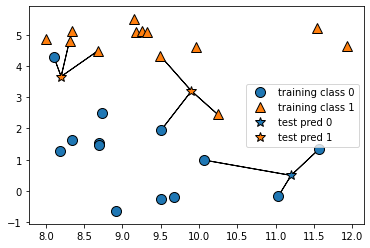

In [19]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [32]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [33]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [34]:
print(f"테스트 세트 예측: {clf.predict(X_test)}")

테스트 세트 예측: [1 0 1 0 0 0 1]


In [35]:
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도: 0.86


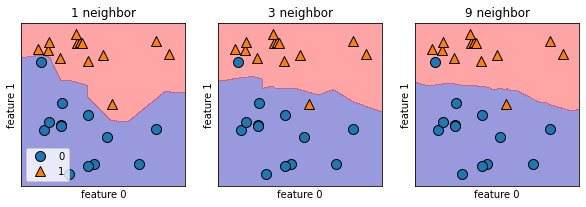

In [36]:
fig,axes = plt.subplots(1, 3, figsize=(10, 3))
for n_neighbors, ax in zip([1,3,9,10], axes):
  clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
  mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
  mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
  ax.set_title(f"{n_neighbors} neighbor")
  ax.set_xlabel("feature 0")
  ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

In [ ]:
from sklearn.datasets im